<a href="https://colab.research.google.com/github/julie-dfx/causal-decision-analytics/blob/main/00_reboot_01_statistics_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reboot: Statistics from Scratch

## Problem
Refresh core statistical intuition and rebuild confidence in Python
by implementing basic statistical concepts from first principles.

## Assumptions
- Data are generated from known distributions
- Focus is on understanding, not performance
- No black-box libraries are used for core logic

## Method
Use simulations to explore sampling distributions, bias, and variance.
Implement estimators manually.

## Results

- By repeatedly sampling from the same data-generating process, I observed that
  the sampling distribution of the sample mean becomes more concentrated as the
  number of observations increases.
- Increasing sample size reduces the variance of the estimator but does not
  eliminate bias: a deliberately biased estimator remains systematically shifted
  away from the true value even with more data.
- This illustrates the Law of Large Numbers in practice: although individual
  observations are noisy, the sample mean converges to the true population mean
  as the number of observations grows.

## Limitations
- Only Gaussian data-generating process
- Artificially constructed biased estimator
- No real-world confounding yet


In [ ]:
import random
import math
import matplotlib.pyplot as plt

In [ ]:
# Define a data generating process
def generate_sample(n):
    """
    Generate n observations from a standard normal distribution.
    """
    return [random.gauss(0, 1) for n in range(n)]

In [ ]:
generate_sample(5)

[-0.48209490122841,
 0.3263857922706162,
 -0.29059306374734223,
 1.5341871702008132,
 0.06076028880937703]

In [ ]:
# Define the sample mean manually
def sample_mean(x):
    """
    Compute the sample mean manually
    """
    return sum(x) / len(x)

In [ ]:
sample_mean([1, 2, 3, 4])

2.5

In [ ]:
# Simulate sampling distribution
def sampling_distribution(n, n_sim=1000):
    """
    Simulate the sampling distribution of the sample mean.
    """
    means=[]
    for i in range (n_sim):
        sample = generate_sample(n)
        mean = sample_mean(sample)
        means.append(sample_mean(sample))
    return means


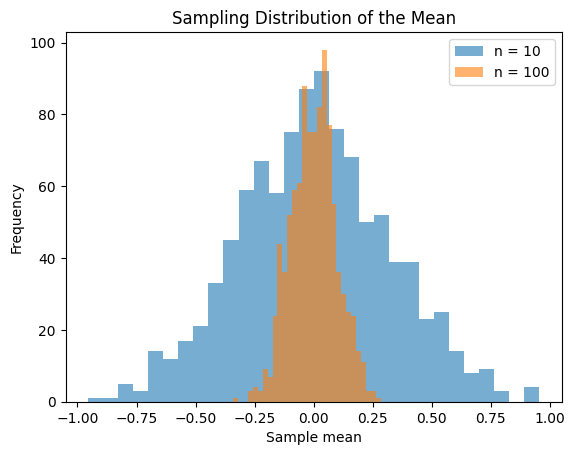

In [ ]:
means_small = sampling_distribution(10)
means_large = sampling_distribution(100)

plt.hist(means_small, bins=30, alpha=0.6, label="n = 10")
plt.hist(means_large, bins=30, alpha=0.6, label="n = 100")
plt.legend()
plt.title("Sampling Distribution of the Mean")
plt.xlabel("Sample mean")
plt.ylabel("Frequency")
plt.show()

 simulate repeated samples from a fixed data-generating process and compute the sample mean for each sample. Repeating this many times allows me to observe the sampling distribution of the estimator (the sample mean).

When the sample size increases from n = 10 to n = 100, the sampling distribution of the mean becomes much more concentrated around the true population mean (0). This does not mean that the mean is computed more “accurately” in a numerical sense, but rather that the variance of the estimator decreases as sample size increases.

This illustrates the Law of Large Numbers: although individual observations are noisy, the sample mean converges to the true mean as the number of observations grows.


In [12]:
# Define a deliberately biased estimator of the mean
def biased_mean(x):
    return (sum(x) / len(x)) + 0.5

In [22]:
def evaluate_estimators(n, n_sim=1000):
    true_value = 0
    unbiased_estimates = []
    biased_estimates = []

    for _ in range(n_sim):
        sample = generate_sample(n)
        unbiased_estimates.append(sample_mean(sample))
        biased_estimates.append(biased_mean(sample))

    return unbiased_estimates, biased_estimates


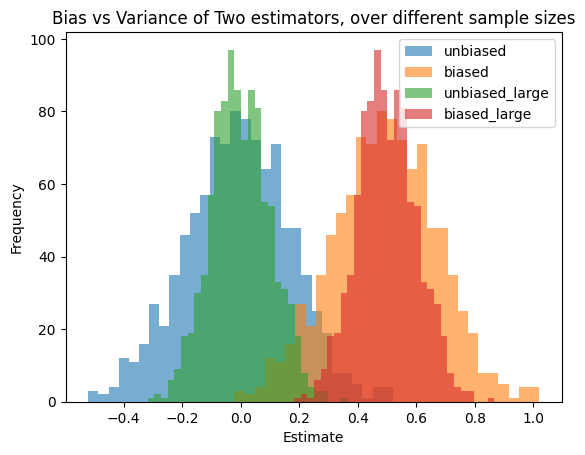

In [24]:
#viz

unbiased, biased = evaluate_estimators(n=30)
unbiased_large, biased_large = evaluate_estimators(n=100)


plt.hist(unbiased, bins=30, alpha = 0.6, label="unbiased")
plt.hist(biased, bins=30, alpha=0.6, label="biased")
plt.hist(unbiased_large, bins=30, alpha = 0.6, label="unbiased_large")
plt.hist(biased_large, bins=30, alpha=0.6, label="biased_large")
plt.legend()
plt.title("Bias vs Variance of Two estimators, over different sample sizes")
plt.xlabel("Estimate")
plt.ylabel("Frequency")
plt.show()